In [1]:
# import required package for data handling
import pandas as pd
import numpy as np

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [2]:
# Create dataframe and fill missing values
#columns=[I1, I2, I3, P_IPO,P_H,P_L,P_1Day,C1,C2,C3,C4]
IPO_df = pd.read_csv('Competition1_raw_data.csv', header=0, na_values=['-'])
IPO_df.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0


#### Data Exploration

In [3]:
# Column names
IPO_df.columns

Index(['I1', 'I2', 'I3', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C2', 'C3',
       'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'],
      dtype='object')

In [4]:
IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


Our dataframe has 682 rows and 22 columns. The datatypes for three columns is object and rest are float.   
There are missing values in columns I3, P(IPO), P(H), P(L), P(1Day), C1, C2, C3, C4, C5, C6, C7, T1, T2, T3, T4, T5, S1, S2, S3

In [5]:
# Change C2 datatype to bool as per the data dictionary.
IPO_df['C2'] = IPO_df['C2'].astype('bool')

In [6]:
pd.options.mode.use_inf_as_na = True

#### Impute with mean for continuous data and mode for categorical data

In [7]:
# Replace the missing data with mean
IPO_df['P(IPO)'].fillna(IPO_df['P(IPO)'].mean(), inplace = True)
IPO_df['P(H)'].fillna(IPO_df['P(H)'].mean(), inplace = True)
IPO_df['P(L)'].fillna(IPO_df['P(L)'].mean(), inplace = True)
IPO_df['P(1Day)'].fillna(IPO_df['P(1Day)'].mean(), inplace = True)
IPO_df['C1'].fillna(IPO_df['C1'].mean(), inplace = True)
IPO_df['C3'].fillna(IPO_df['C3'].mean(), inplace = True)
IPO_df['C4'].fillna(IPO_df['C4'].mean(), inplace = True)
IPO_df['C5'].fillna(IPO_df['C5'].mean(), inplace = True)
IPO_df['C6'].fillna(IPO_df['C6'].mean(), inplace = True)
IPO_df['C7'].fillna(IPO_df['C7'].mean(), inplace = True)
IPO_df['T1'].fillna(IPO_df['T1'].mean(), inplace = True)
IPO_df['T2'].fillna(IPO_df['T2'].mean(), inplace = True)
IPO_df['T3'].fillna(IPO_df['T3'].mean(), inplace = True)
IPO_df['T4'].fillna(IPO_df['T4'].mean(), inplace = True)
IPO_df['T5'].fillna(IPO_df['T5'].mean(), inplace = True)
IPO_df['S1'].fillna(IPO_df['S1'].mean(), inplace = True)
IPO_df['S2'].fillna(IPO_df['S2'].mean(), inplace = True)
IPO_df['S3'].fillna(IPO_df['S3'].mean(), inplace = True)

# Replace the missing data with mode
IPO_df['C2'].fillna(IPO_df['C2'].mean(), inplace = True)

# Imputation using fillna with chaining method and and then selecting the top category, which is the mode, with the `.index` attribute
IPO_df['I3'].fillna(IPO_df['I3'].value_counts().index[0], inplace=True)

IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     682 non-null float64
P(H)       682 non-null float64
P(L)       682 non-null float64
P(1Day)    682 non-null float64
C1         682 non-null float64
C2         682 non-null bool
C3         682 non-null float64
C4         682 non-null float64
C5         682 non-null float64
C6         682 non-null float64
C7         682 non-null float64
T1         682 non-null float64
T2         682 non-null float64
T3         682 non-null float64
T4         682 non-null float64
T5         682 non-null float64
S1         682 non-null float64
S2         682 non-null float64
S3         682 non-null float64
dtypes: bool(1), float64(18), object(3)
memory usage: 112.6+ KB


In [8]:
IPO_df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.031467,6.604398,5.792641,72.042293,150.328785,158.308600,0.032775,1.039156e+08,2.501761e+07,1558.767222,175.612567,5445.641920,4836.115518,121.443374,472.566975,39.067810,84.766654,69.225403
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9195.750000,8168.000000,213.250000,462.250000,45.000000,73.000000,100.000000
50%,13.500000,15.481190,13.000000,15.000000,110.000000,0.070000,0.007282,2.759165e+07,7.500000e+06,134.738000,444.500000,12047.000000,10789.000000,279.500000,624.500000,60.000000,100.500000,134.000000
75%,17.000000,17.000000,15.000000,21.030001,152.750000,0.600000,0.030941,4.938184e+07,1.208721e+07,500.459962,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.750000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


#### Handling Outliers

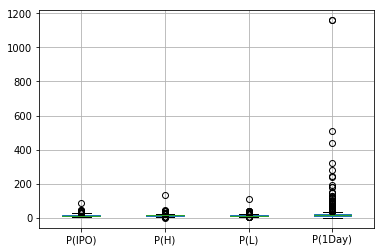

In [9]:
IPO_df.boxplot(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)'])

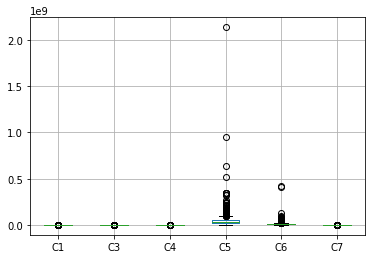

In [10]:
IPO_df.boxplot(['C1', 'C3', 'C4','C5', 'C6', 'C7'])

In [11]:
# Seperate the continuous variables for removing skewness in distribution.
df_num = IPO_df.select_dtypes(include=["float"])
df_cat = IPO_df.select_dtypes(exclude=["float"])

In [12]:
# Removing outliers from the data using InterQuartilRange
Q1 = df_num.quantile(0.20)
Q3 = df_num.quantile(0.80)
IQR = Q3 - Q1
idx = ~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)
IPO_df = pd.concat([df_num.loc[idx], df_cat.loc[idx]], axis=1)

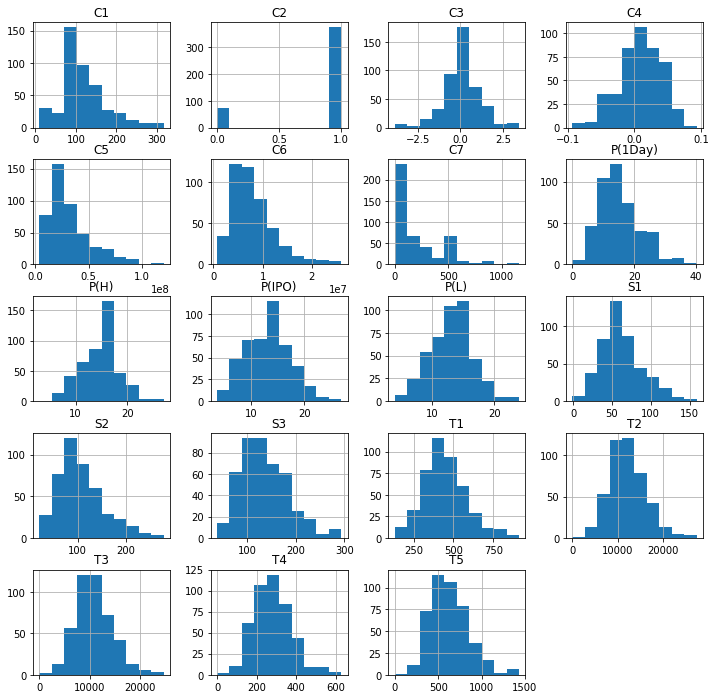

In [13]:
# Plot histogram to see the skewness/distribution of each column
pd.DataFrame.hist(IPO_df, figsize = [12,12]);

In [14]:
IPO_df.shape

(449, 22)

#### Add variables using existing data based on the data dictionary.

###### Derive new variables from existing variable and by creating dummy variables.

In [15]:
# Add Positive EPS dummy column C3_D with dummy variable set to 1 if C3 is positive, otherwise 0. 
IPO_df['C3_D'] = np.where(IPO_df['C3']>0, 1, 0)

# Add Share Overhang column C5_D.
IPO_df['C5_D']=IPO_df['C5']/IPO_df['C6']

# Add Up Revision column C6_D.
IPO_df['P(mid)'] = ((IPO_df['P(H)']+IPO_df['P(L)'])/2)
IPO_df['C6_D'] = ((IPO_df['P(IPO)']-IPO_df['P(mid)'])/IPO_df['P(mid)']*0.01).where((IPO_df['P(IPO)'] > IPO_df['P(mid)']), 0)

In [16]:
# Create column T1_D with Percent of long sentences
IPO_df['T1_D']=IPO_df['T4']/IPO_df['T1']
# Create column T3_D with Percent of real words
IPO_df['T3_D']=IPO_df['T3']/IPO_df['T2']
# Create column T5_D with Percent of long words
IPO_df['T5_D']=IPO_df['T5']/IPO_df['T2']
# Create column S1_D with Percent of Positive words
IPO_df['S1_D']=IPO_df['S1']/IPO_df['T2']
# Create column S2_D with Percent of real words
IPO_df['S2_D']=IPO_df['S2']/IPO_df['T2']
# Create column S3_D with Percent of real words
IPO_df['S3_D']=IPO_df['S3']/IPO_df['T2']

In [17]:
# Replace the missing data with mean
IPO_df['T3_D'].fillna(IPO_df['T3_D'].mean(), inplace = True)
IPO_df['T5_D'].fillna(IPO_df['T5_D'].mean(), inplace = True)
IPO_df['S1_D'].fillna(IPO_df['S1_D'].mean(), inplace = True)
IPO_df['S2_D'].fillna(IPO_df['S2_D'].mean(), inplace = True)
IPO_df['S3_D'].fillna(IPO_df['S3_D'].mean(), inplace = True)
IPO_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 680
Data columns (total 32 columns):
P(IPO)     449 non-null float64
P(H)       449 non-null float64
P(L)       449 non-null float64
P(1Day)    449 non-null float64
C1         449 non-null float64
C3         449 non-null float64
C4         449 non-null float64
C5         449 non-null float64
C6         449 non-null float64
C7         449 non-null float64
T1         449 non-null float64
T2         449 non-null float64
T3         449 non-null float64
T4         449 non-null float64
T5         449 non-null float64
S1         449 non-null float64
S2         449 non-null float64
S3         449 non-null float64
I1         449 non-null object
I2         449 non-null object
I3         449 non-null object
C2         449 non-null bool
C3_D       449 non-null int64
C5_D       449 non-null float64
P(mid)     449 non-null float64
C6_D       449 non-null float64
T1_D       449 non-null float64
T3_D       449 non-null float64
T5_D   

##### Adding Target Variables

In [18]:
# Add Pre-IPO Price Revision column Y1.
IPO_df['Y1'] = np.where(IPO_df['P(IPO)'] < ((IPO_df['P(H)'] + IPO_df['P(L)'])/2), '1', '0')
IPO_df['Y1'] = IPO_df['Y1'].astype('int')

#Add Post-IPO Initial Return column Y2.
IPO_df['Y2'] = np.where(IPO_df['P(IPO)'] < IPO_df['P(1Day)'], '1', '0')
IPO_df['Y2'] = IPO_df['Y2'].astype('int')

IPO_df.info()
#df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 680
Data columns (total 34 columns):
P(IPO)     449 non-null float64
P(H)       449 non-null float64
P(L)       449 non-null float64
P(1Day)    449 non-null float64
C1         449 non-null float64
C3         449 non-null float64
C4         449 non-null float64
C5         449 non-null float64
C6         449 non-null float64
C7         449 non-null float64
T1         449 non-null float64
T2         449 non-null float64
T3         449 non-null float64
T4         449 non-null float64
T5         449 non-null float64
S1         449 non-null float64
S2         449 non-null float64
S3         449 non-null float64
I1         449 non-null object
I2         449 non-null object
I3         449 non-null object
C2         449 non-null bool
C3_D       449 non-null int64
C5_D       449 non-null float64
P(mid)     449 non-null float64
C6_D       449 non-null float64
T1_D       449 non-null float64
T3_D       449 non-null float64
T5_D   

##### Seperating source data and target variables

In [19]:
# Create dataframe 'var_df' for the preditive data
var_df = IPO_df.iloc[:,:-2]

# a dataframe 'target' for the target variables.
target = IPO_df.iloc[:,-2:]

var_df.columns

Index(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7',
       'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'I1', 'I2', 'I3', 'C2',
       'C3_D', 'C5_D', 'P(mid)', 'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D',
       'S2_D', 'S3_D'],
      dtype='object')

#### Replacing tuple values in 'I3' column with zero

In [20]:
# Check for the number of null-values in I3 column
var_df.I3.isnull().values.sum()

0

In [21]:
var_df['I3'].value_counts()

2834    48
7372    41
3674    25
7389    24
3841    22
1311    12
3845    10
7371     8
7373     7
5812     7
4899     6
4412     6
5600     6
7374     5
8731     5
2836     5
3661     5
7359     5
2860     5
3663     5
3825     5
3577     4
7379     4
1389     4
3572     4
4813     4
8742     4
8090     3
6324     3
7311     3
        ..
3562     1
2750     1
3531     1
3411     1
3826     1
5331     1
5400     1
3312     1
4953     1
5065     1
3851     1
5945     1
5900     1
4941     1
5047     1
7830     1
3711     1
5499     1
5641     1
3911     1
3568     1
2080     1
3651     1
3646     1
8351     1
3442     1
8051     1
4581     1
7370     1
2844     1
Name: I3, Length: 148, dtype: int64

In [22]:
# check the value in column contains ',', if so then replace the whole value as '0'
var_df.I3[var_df.I3.str.contains(",")] = '0'
var_df.I3[var_df.I3.str.contains(" ")] = '0'

# look at the value counts to see if they are changed
var_df['I3'].value_counts()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


2834    48
7372    41
3674    25
7389    24
3841    22
1311    12
3845    10
7371     8
5812     7
7373     7
4899     6
5600     6
4412     6
8731     5
3663     5
3825     5
3661     5
2836     5
7374     5
7359     5
2860     5
3572     4
3577     4
7379     4
8742     4
1389     4
4813     4
4911     3
0        3
6324     3
        ..
5531     1
3562     1
3999     1
7384     1
8082     1
3531     1
3411     1
5331     1
5400     1
3312     1
4953     1
5065     1
5945     1
5900     1
4941     1
5047     1
7830     1
3826     1
5641     1
3911     1
3568     1
2080     1
3651     1
3646     1
8351     1
3442     1
8051     1
4581     1
7370     1
2844     1
Name: I3, Length: 146, dtype: int64

In [23]:
# Changing I3 datatype to float
var_df['I3'] = var_df['I3'].astype('float')

#### Binning the variable 'I3'

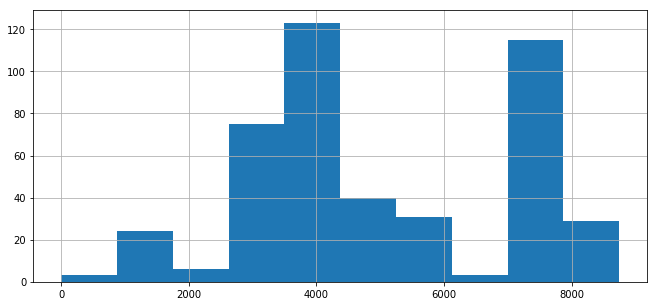

In [24]:
# Check distribution of the data in I3 column for binning.
pd.Series.hist(var_df['I3'], figsize = [11,5]);

In [25]:
# Binning I3 data into four classes based on below range for each class
def assign_label(df_I3):
    if df_I3 > 0 and df_I3 < 4000:
        return 1
    elif df_I3 >= 4000 and df_I3 < 6000:
        return 2
    elif df_I3 >= 6000 and df_I3 < 10000:
        return 3
    elif df_I3 >= 10000:
        return 4
      
var_df['I3'] = var_df['I3'].apply(assign_label)    
dummy_df = pd.get_dummies(var_df['I3'], prefix='Class')
df1 = pd.concat([var_df, dummy_df], axis=1)

df1.head()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,...,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,Class_1.0,Class_2.0,Class_3.0
0,10.0,9.5,8.5,11.87,122.0,3.43,0.029074,40962052.0,10600000.0,51.345,...,0.001111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,1,0,0
1,8.0,10.0,8.0,7.25,259.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,...,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,1,0,0
2,7.0,14.0,12.0,6.70,90.0,-1.24,0.020715,16845668.0,5000000.0,7.378,...,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,1,0,0
3,11.5,16.0,14.0,12.39,209.0,-0.91,0.020023,14848637.0,4500000.0,8.526,...,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,1,0,0
5,13.5,14.5,12.5,14.20,94.0,0.06,-0.057556,42402916.0,7407407.0,197.591,...,0.000000,0.643137,0.774154,0.045280,0.003445,0.005334,0.010056,0,0,1


##### Droping the redundant columns

In [26]:
drop_cols = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)','I1','I2', 'I3', 'C3', 'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

In [27]:
# Drop columns 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)','I1','I2', 'I3', 'C3', 'C4', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'
df = df1.drop(columns = drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 680
Data columns (total 15 columns):
C1           449 non-null float64
C7           449 non-null float64
C2           449 non-null bool
C3_D         449 non-null int64
C5_D         449 non-null float64
C6_D         449 non-null float64
T1_D         449 non-null float64
T3_D         449 non-null float64
T5_D         449 non-null float64
S1_D         449 non-null float64
S2_D         449 non-null float64
S3_D         449 non-null float64
Class_1.0    449 non-null uint8
Class_2.0    449 non-null uint8
Class_3.0    449 non-null uint8
dtypes: bool(1), float64(10), int64(1), uint8(3)
memory usage: 43.8 KB


In [28]:
# Plot histogram to see the skewness/distribution of each column
#pd.DataFrame.hist(df, figsize = [12,12]);

#### Handling Skewness

In [29]:
# Remove skewness from the data using square root, log, cube root for positively skewed data.
df['C1'] = df.C1**(1/2)
df['C5_D'] = df['C5_D']**(1/2)
df['C6_D'] = np.log(df['C6_D'] +1)
df['C7'] = df.C7**(1/3)
df['S1_D'] = df['S1_D']**(1/2)
df['S2_D'] = df['S2_D']**(1/2)
df['S3_D'] = df['S3_D']**(1/2)

# Remove skewness from the data using square for negatively skewed data.
df['T1_D'] = df['T1_D']**(2)
df['T3_D'] = df['T3_D']**(2)
df['T5_D'] = df['T5_D']**(2)

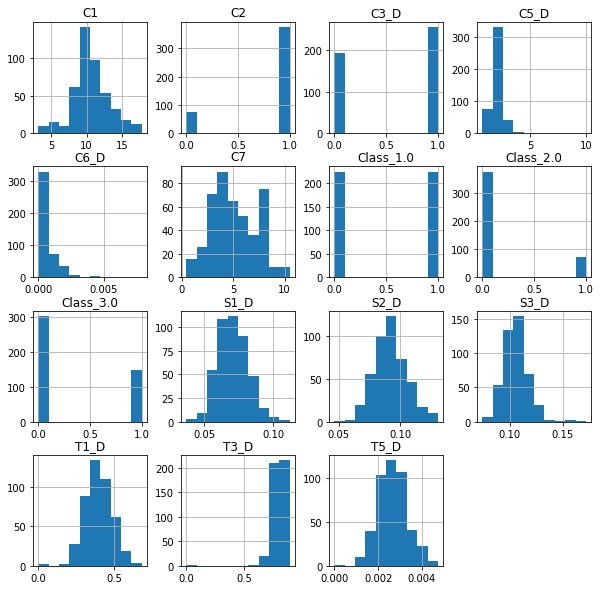

In [30]:
# Check skewness with histogram plot for each column
pd.DataFrame.hist(df, figsize = [10,10]);

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 680
Data columns (total 15 columns):
C1           449 non-null float64
C7           449 non-null float64
C2           449 non-null bool
C3_D         449 non-null int64
C5_D         449 non-null float64
C6_D         449 non-null float64
T1_D         449 non-null float64
T3_D         449 non-null float64
T5_D         449 non-null float64
S1_D         448 non-null float64
S2_D         449 non-null float64
S3_D         449 non-null float64
Class_1.0    449 non-null uint8
Class_2.0    449 non-null uint8
Class_3.0    449 non-null uint8
dtypes: bool(1), float64(10), int64(1), uint8(3)
memory usage: 43.8 KB


In [32]:
# Replace the missing data with mean
df['S1_D'].fillna(df['S1_D'].mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 680
Data columns (total 15 columns):
C1           449 non-null float64
C7           449 non-null float64
C2           449 non-null bool
C3_D         449 non-null int64
C5_D         449 non-null float64
C6_D         449 non-null float64
T1_D         449 non-null float64
T3_D         449 non-null float64
T5_D         449 non-null float64
S1_D         449 non-null float64
S2_D         449 non-null float64
S3_D         449 non-null float64
Class_1.0    449 non-null uint8
Class_2.0    449 non-null uint8
Class_3.0    449 non-null uint8
dtypes: bool(1), float64(10), int64(1), uint8(3)
memory usage: 43.8 KB


#### Data Normalization and Data Scaling

In [33]:
# Seperate continuous data for data scaling and data normalization
data_num = df.select_dtypes(include=['float'])
data_cat = df.select_dtypes(exclude=['float'])

from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.pipeline import Pipeline

scaler= MinMaxScaler()
scaler.fit_transform(data_num)

#Normalize data
normalize(data_num, norm='l1', axis=1, copy=True)

data1 = pd.concat([data_num, data_cat], axis=1)

data1.describe()

,C1,C7,C5_D,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,C3_D,Class_1.0,Class_2.0,Class_3.0
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,10.598179,5.082318,1.992324,0.000553,0.397619,0.794920,2.661766e-03,0.070765,0.092399,0.105829,0.567929,0.501114,0.164811,0.327394
std,2.581888,2.171957,0.643733,0.000946,0.090930,0.067242,6.669395e-04,0.011048,0.013168,0.011923,0.495917,0.500556,0.371423,0.469786
min,3.162278,0.419834,0.668679,0.000000,0.000000,0.000000,7.935055e-09,0.037268,0.046394,0.074628,0.000000,0.000000,0.000000,0.000000
25%,9.165151,3.440068,1.684725,0.000000,0.336129,0.779506,2.191290e-03,0.063434,0.082768,0.097482,0.000000,0.000000,0.000000,0.000000
50%,10.295630,4.722347,1.926198,0.000000,0.395638,0.803006,2.607353e-03,0.069710,0.092194,0.105541,1.000000,1.000000,0.000000,0.000000
75%,12.041595,6.845115,2.193096,0.000869,0.452084,0.827029,3.082233e-03,0.077908,0.100119,0.112762,1.000000,1.000000,0.000000,1.000000
max,17.804494,10.508235,9.989357,0.007900,0.682850,0.893935,4.724773e-03,0.111814,0.130974,0.171456,1.000000,1.000000,1.000000,1.000000


In [34]:
# Change the datatypes for Y1 and Y2 to bool.
target['Y1'] = target['Y1'].astype('bool')
target['Y2'] = target['Y2'].astype('bool')

In [35]:
# Change the datatypes for Class_1.0, Class_2.0 and Class_3.0 to float.
data1['Class_1.0'] = data1['Class_1.0'].astype('float')
data1['Class_2.0'] = data1['Class_2.0'].astype('float')
data1['Class_3.0'] = data1['Class_3.0'].astype('float')

In [36]:
# Add target variables into our dataframe
result_df = pd.concat([data1, target], axis=1)
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 680
Data columns (total 17 columns):
C1           449 non-null float64
C7           449 non-null float64
C5_D         449 non-null float64
C6_D         449 non-null float64
T1_D         449 non-null float64
T3_D         449 non-null float64
T5_D         449 non-null float64
S1_D         449 non-null float64
S2_D         449 non-null float64
S3_D         449 non-null float64
C2           449 non-null bool
C3_D         449 non-null int64
Class_1.0    449 non-null float64
Class_2.0    449 non-null float64
Class_3.0    449 non-null float64
Y1           449 non-null bool
Y2           449 non-null bool
dtypes: bool(3), float64(13), int64(1)
memory usage: 53.9 KB


#### Feature Selection using Correlation Analysis

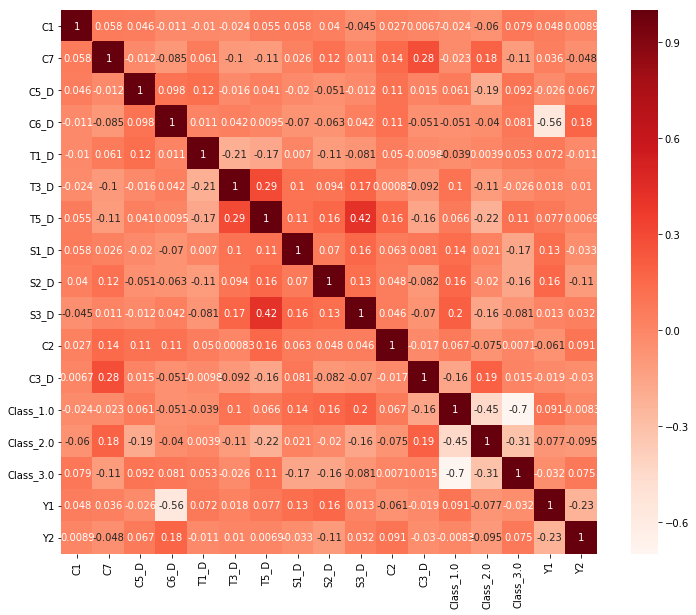

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = result_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

In [38]:
#Correlation with output variable Y1
cor_target1 = abs(cor["Y1"])
#Remove highly correlated features
features1 = cor_target1[cor_target1>0.5]
features1

C6_D    0.56024
Y1      1.00000
Name: Y1, dtype: float64

In [39]:
#Correlation with output variable Y1
cor_target2 = abs(cor["Y2"])
#Remove highly correlated features
features2 = cor_target2[cor_target2>0.5]
features2

Y2    1.0
Name: Y2, dtype: float64

C6_D is highly correlated for Y1 but not for Y2. Hence, we select all our variables based on Correlation AnalysisWe keep all the variables 

In [40]:
#Feature Matrix
X1 = result_df.drop(columns = ['Y1', 'Y2'])

#Target Variables
y1 = result_df['Y1']          
y2 = result_df['Y2']

X1.columns

Index(['C1', 'C7', 'C5_D', 'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D', 'S2_D',
       'S3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0', 'Class_3.0'],
      dtype='object')

##### FEATURE SELECTION USING RFE

In [41]:
# Import ther necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
cols = list(X1.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  
#Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[False False  True False  True False False  True  True False  True False
  True  True False]
[7 3 1 2 1 6 9 1 1 5 1 4 1 1 8]
Index(['C5_D', 'T1_D', 'S1_D', 'S2_D', 'C2', 'Class_1.0', 'Class_2.0'], dtype='object')


In [43]:
cols = list(X1.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 9)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y2)  
#Fitting the data to model
model.fit(X_rfe,y2)
print(rfe.support_)
print(rfe.ranking_)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[False False  True False  True  True False False  True  True  True False
  True  True  True]
[6 2 1 5 1 1 7 3 1 1 1 4 1 1 1]
Index(['C5_D', 'T1_D', 'T3_D', 'S2_D', 'S3_D', 'C2', 'Class_1.0', 'Class_2.0',
       'Class_3.0'],
      dtype='object')


In [44]:
result_df.columns

Index(['C1', 'C7', 'C5_D', 'C6_D', 'T1_D', 'T3_D', 'T5_D', 'S1_D', 'S2_D',
       'S3_D', 'C2', 'C3_D', 'Class_1.0', 'Class_2.0', 'Class_3.0', 'Y1',
       'Y2'],
      dtype='object')

In [46]:
result_df.to_csv('Final Dataset.csv', index=False)